# **Proyecto Machine Learning**





Primero se deben importar las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Luego, cargaremos los datos de las notas de los examenes botenidos por estudiantes de secundaria

In [ ]:
url='https://raw.githubusercontent.com/dennisagonza/InteligenciaArtificial/main/Codigo/StudentsPerformance.csv'
students=pd.read_csv(url)

Para empezar podemos ver las primeras filas de la tabla para poder ver que datos se estan presentando en este archivo


In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Creamos una variable donde se sumarian los tres puntajes por estudiante y asi poder analizar mucho mas facil el rendimiento de estos en general, tambien filtramos los estudiantes que obtuvieron el mayor puntaje total e imprimos todos sus datos para su comparación

In [ ]:
PuntajeTotal=students['math score']+students['writing score']+students['reading score']
print(PuntajeTotal[PuntajeTotal==300])

458    300
916    300
962    300
dtype: int64


In [ ]:
students[458:459]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100


In [ ]:
students[916:917]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
916,male,group E,bachelor's degree,standard,completed,100,100,100


In [ ]:
students[962:963]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100


Tambien se describio la informacion de cada columna de Puntajes, para obtener informacion especifica como lo fue el mayor y menor puntaje de cada examen y el promedio de estos.

In [ ]:
students['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [ ]:
students['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [ ]:
students['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

¿Que genero obtuvo el mejor puntaje?

Text(0.5, 6.79999999999999, 'Genero')

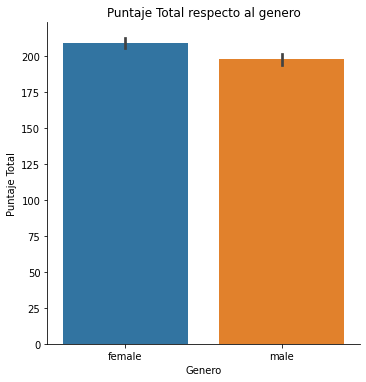

In [ ]:
sns.catplot(x='gender', y=PuntajeTotal, kind='bar', data=students)
plt.title("Puntaje Total respecto al genero")
plt.ylabel("Puntaje Total")
plt.xlabel("Genero")

¿Hay relacion entre los puntajes obtenidos y que completaran un test de preparacion para el curso?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Test de preparación')

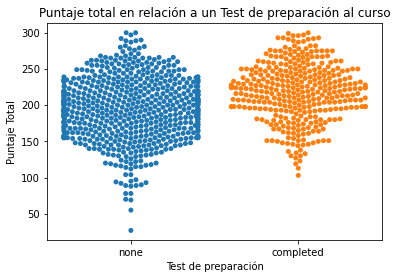

In [ ]:
sns.swarmplot(x=students['test preparation course'], y=PuntajeTotal)
plt.title("Puntaje total en relación a un Test de preparación al curso")
plt.ylabel("Puntaje Total")
plt.xlabel("Test de preparación")

¿Que grupos etnicos tuvieron mejor puntaje?

Text(0.5, 6.79999999999999, 'Raza/Etnia')

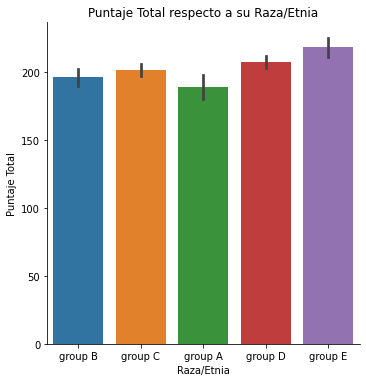

In [ ]:
sns.catplot(x='race/ethnicity', y=PuntajeTotal, kind='bar', data=students)
plt.title("Puntaje Total respecto a su Raza/Etnia")
plt.ylabel("Puntaje Total")
plt.xlabel("Raza/Etnia")


 Generamos un histograma para cada materia

 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0fa5a950>,
      dtype=object)

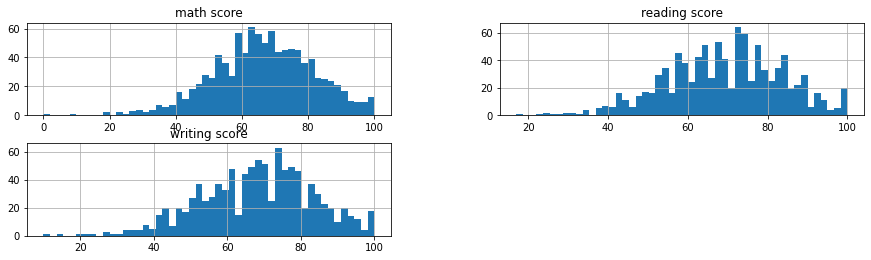

In [ ]:
pd.DataFrame.hist(students, layout=(7,2), figsize=(15,15), bins=50)

In [ ]:
stu_labels=students['math score']


In [ ]:
stu_labels

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
students.drop('math score',axis=1,inplace=True)

In [ ]:
students

,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,group B,bachelor's degree,standard,none,72,74
1,group C,some college,standard,completed,90,88
2,group B,master's degree,standard,none,95,93
3,group A,associate's degree,free/reduced,none,57,44
4,group C,some college,standard,none,78,75
...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,99,95
996,group C,high school,free/reduced,none,55,55
997,group C,high school,free/reduced,completed,71,65
998,group D,some college,standard,completed,78,77


Creamos una combinación entre los puntajes de las áreas de lectura y escritura

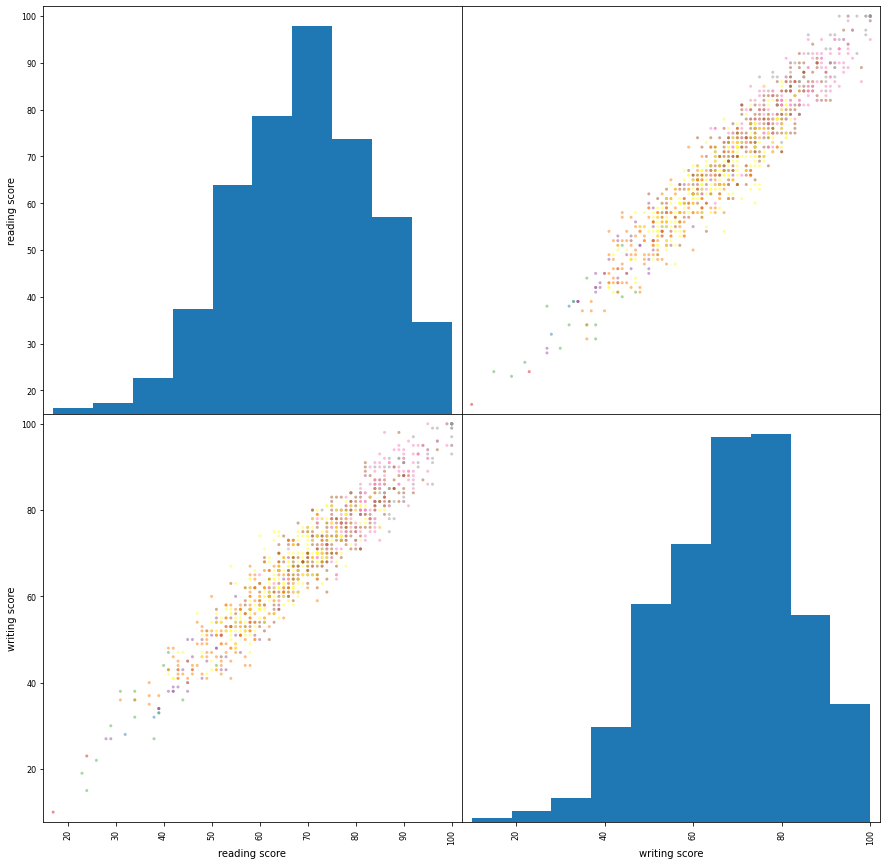

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Set1') # Colour map (there are many others)

pd.plotting.scatter_matrix(students, c=stu_labels, cmap=cmap, figsize=(15, 15));

In [ ]:
stu_labels = students['gender'].replace(['female','male'],[0,1])
students.drop('gender',axis=1,inplace=True)
students.drop('race/ethnicity',axis=1,inplace=True)
students.drop('parental level of education',axis=1,inplace=True)
students.drop('lunch',axis=1,inplace=True)
students.drop('test preparation course',axis=1,inplace=True)

In [ ]:
stu_labels

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64

In [ ]:
X=np.array(students)
y=np.array(stu_labels)

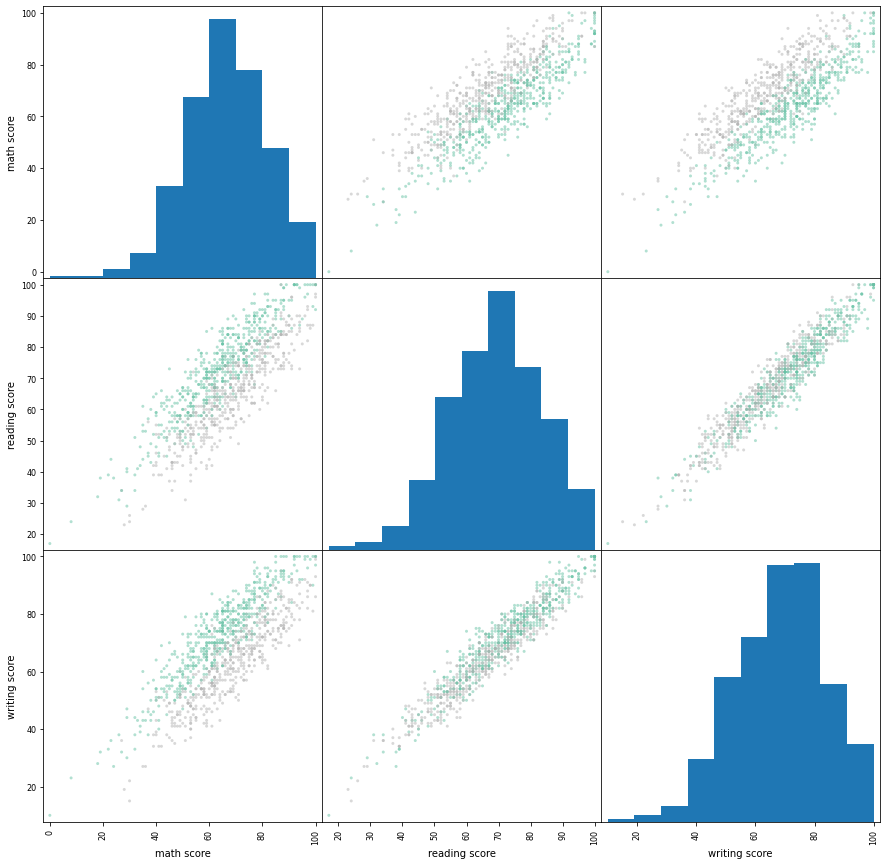

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Set2') # Colour map (there are many others)

pd.plotting.scatter_matrix(students, c=stu_labels, cmap=cmap, figsize=(15, 15));

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
sc_x = StandardScaler()
sc_x.fit(X)
X_scaled = sc_x.transform(X)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,
                  stratify=y,
                  test_size=0.3,
                  random_state=1)